In [ ]:
!unzip archive.zip -d ./anndataset

Archive:  archive.zip
   creating: ./anndataset/archive/
   creating: ./anndataset/archive/Boat Pose/
  inflating: ./anndataset/archive/Boat Pose/File1.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File10.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File11.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File12.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File13.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File14.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File15.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File16.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File17.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File18.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File2.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File3.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File4.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File5.jpeg  
  inflating: ./anndataset/archive/Boat Pose/File6.jpeg  
  inflating: ./anndataset/archive/

In [ ]:
pip install tensorflow

In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00


In [ ]:
# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras import preprocessing


In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom

In [ ]:
# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

## **Create helper functions**

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2025-05-13 18:25:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-05-13 18:25:06 (54.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## **Load and transform data**

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [ ]:
# Walk through each directory
dataset = "anndataset"
walk_through_dir(dataset)

There are 1 directories and 0 images in 'anndataset'.
There are 47 directories and 1 images in 'anndataset/archive'.
There are 0 directories and 73 images in 'anndataset/archive/Garland Pose (Deep Squat)'.
There are 0 directories and 68 images in 'anndataset/archive/Tree Pose'.
There are 0 directories and 74 images in 'anndataset/archive/Downward-Facing Dog Pose'.
There are 0 directories and 84 images in 'anndataset/archive/Crow Pose'.
There are 0 directories and 43 images in 'anndataset/archive/Pyramid Pose'.
There are 0 directories and 53 images in 'anndataset/archive/One-Legged King Pigeon Pose'.
There are 0 directories and 79 images in 'anndataset/archive/Child's Pose'.
There are 0 directories and 59 images in 'anndataset/archive/Half Moon Pose'.
There are 0 directories and 12 images in 'anndataset/archive/Crescent Moon Pose (High Lunge)'.
There are 0 directories and 71 images in 'anndataset/archive/Standing Forward Bend'.
There are 0 directories and 23 images in 'anndataset/archiv

## **Placing data into a Dataframe**

In [ ]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
image_df

,Filepath,Label
0,anndataset/archive/Downward-Facing Dog Pose/Fi...,Downward-Facing Dog Pose
1,anndataset/archive/Child's Pose/File52.jpg,Child's Pose
2,anndataset/archive/Child's Pose/File62.jpg,Child's Pose
3,anndataset/archive/Child's Pose/File45.jpg,Child's Pose
4,anndataset/archive/Half Boat Pose/File13.jpg,Half Boat Pose
...,...,...
4664,anndataset/archive/Forearm Stand/File26.png,Forearm Stand
4665,anndataset/archive/Forearm Stand/File15.png,Forearm Stand
4666,anndataset/archive/Forearm Stand/File10.png,Forearm Stand
4667,anndataset/archive/Forearm Stand/File1.png,Forearm Stand


## **Visualizing images from the dataset**

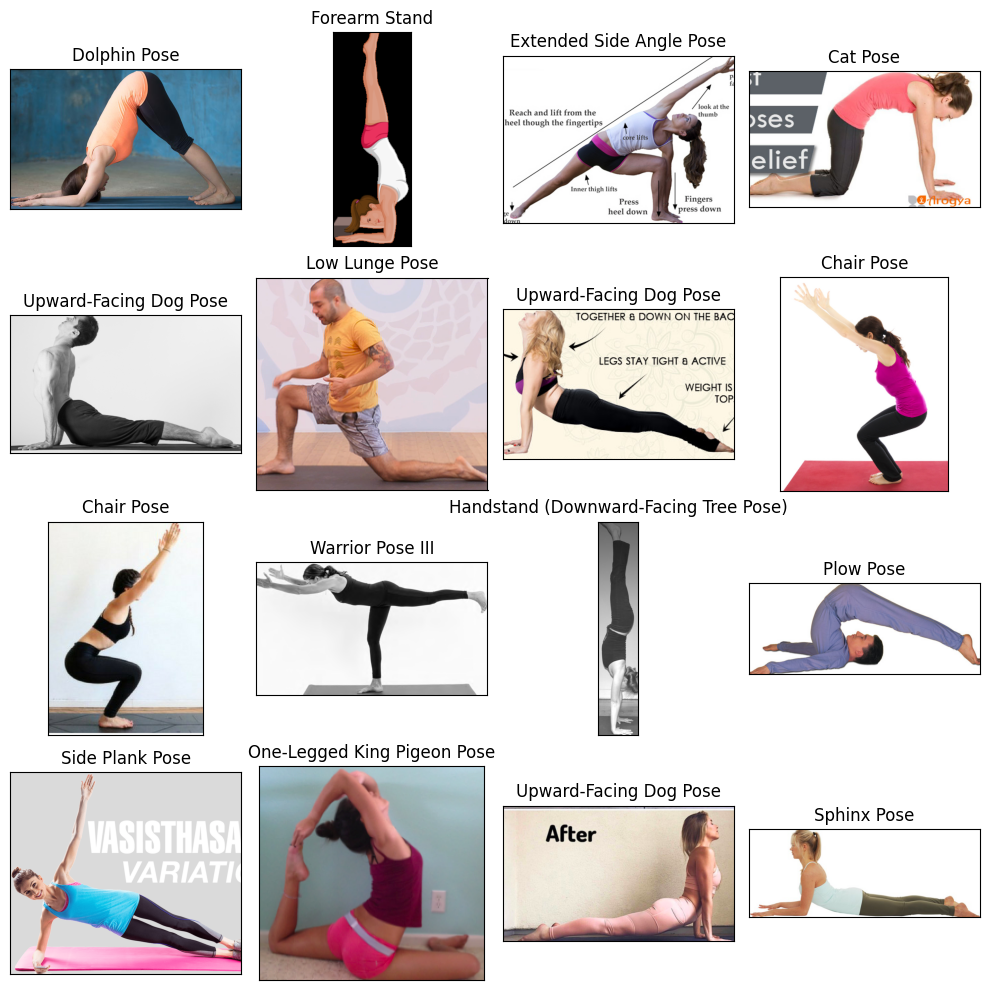

In [ ]:
# Display 9 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

## **Computing Error Rate Analysis**

In [ ]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')

    items = list(items)

    p = random.choice(items)
    return p.as_posix()

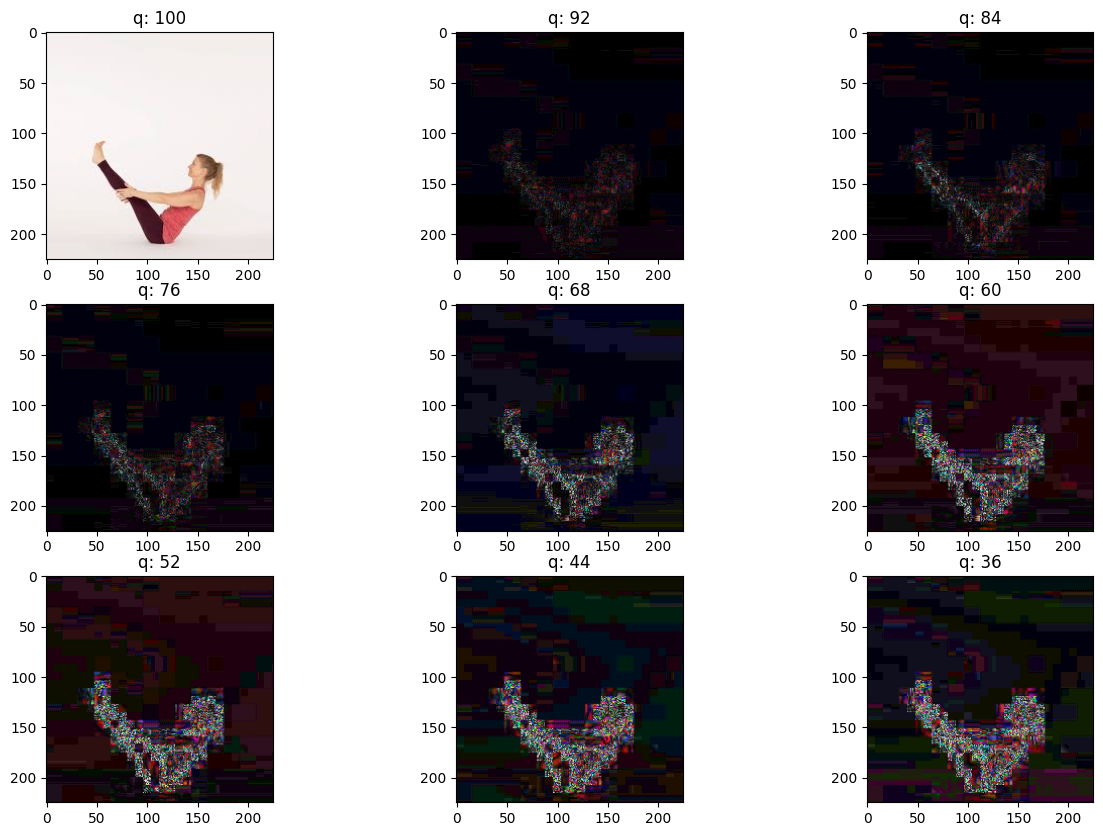

In [ ]:
# View random sample from the dataset
p = random_sample('anndataset/archive/Boat Pose')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()


## **Data Preprocessing**

In [ ]:
# Separate in train and test data
y = image_df['Label']
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True,stratify=y, random_state=42)

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

In [ ]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2988 validated image filenames belonging to 43 classes.
Found 747 validated image filenames belonging to 43 classes.
Found 934 validated image filenames belonging to 43 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

In [ ]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(224, 224),
    layers.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
])


## **Training the model**

In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

#unfreeze layers
pretrained_model.trainable = True
print("Number of layers in the base model: ", len(pretrained_model.layers))

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Number of layers in the base model:  188


In [ ]:
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in pretrained_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
checkpoint_path = "yoga_classification_model_checkpoint.weights.h5"
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    monitor="val_accuracy",
    save_best_only=True
)


In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)

## **Train the model**

In [ ]:
inputs = pretrained_model.input
x = resize_and_rescale(inputs)
x = data_augmentation(x)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(43, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=30,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "yoga_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/yoga_classification/20250513-184721
Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 81s 449ms/step - accuracy: 0.0235 - loss: 3.9492 - val_accuracy: 0.0281 - val_loss: 3.8021
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 247ms/step - accuracy: 0.0439 - loss: 3.7674 - val_accuracy: 0.0415 - val_loss: 3.6635
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 236ms/step - accuracy: 0.0658 - loss: 3.6428 - val_accuracy: 0.0884 - val_loss: 3.5432
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 253ms/step - accuracy: 0.1042 - loss: 3.5058 - val_accuracy: 0.1258 - val_loss: 3.4254
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.1468 - loss: 3.3846 - val_accuracy: 0.1847 - val_loss: 3.2957
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.1747 - loss: 3.2794 - val_accuracy: 0.2356 - val_loss: 3.1525
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 253ms/step - accuracy: 0.2112 - loss: 3.1320 - val_accuracy: 0.2972 - val_loss: 2.9927
Epoch 8/30
94/

## **Model Evaluation**

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.59690
Test Accuracy: 86.51%


## **Making predictions on the test data**

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step
The first 5 predictions: ['Half Lord of the Fishes Pose', 'Standing Forward Bend', 'Garland Pose (Deep Squat)', 'Forearm Stand', "Child's Pose"]


## **Displaying random pics with their labels**

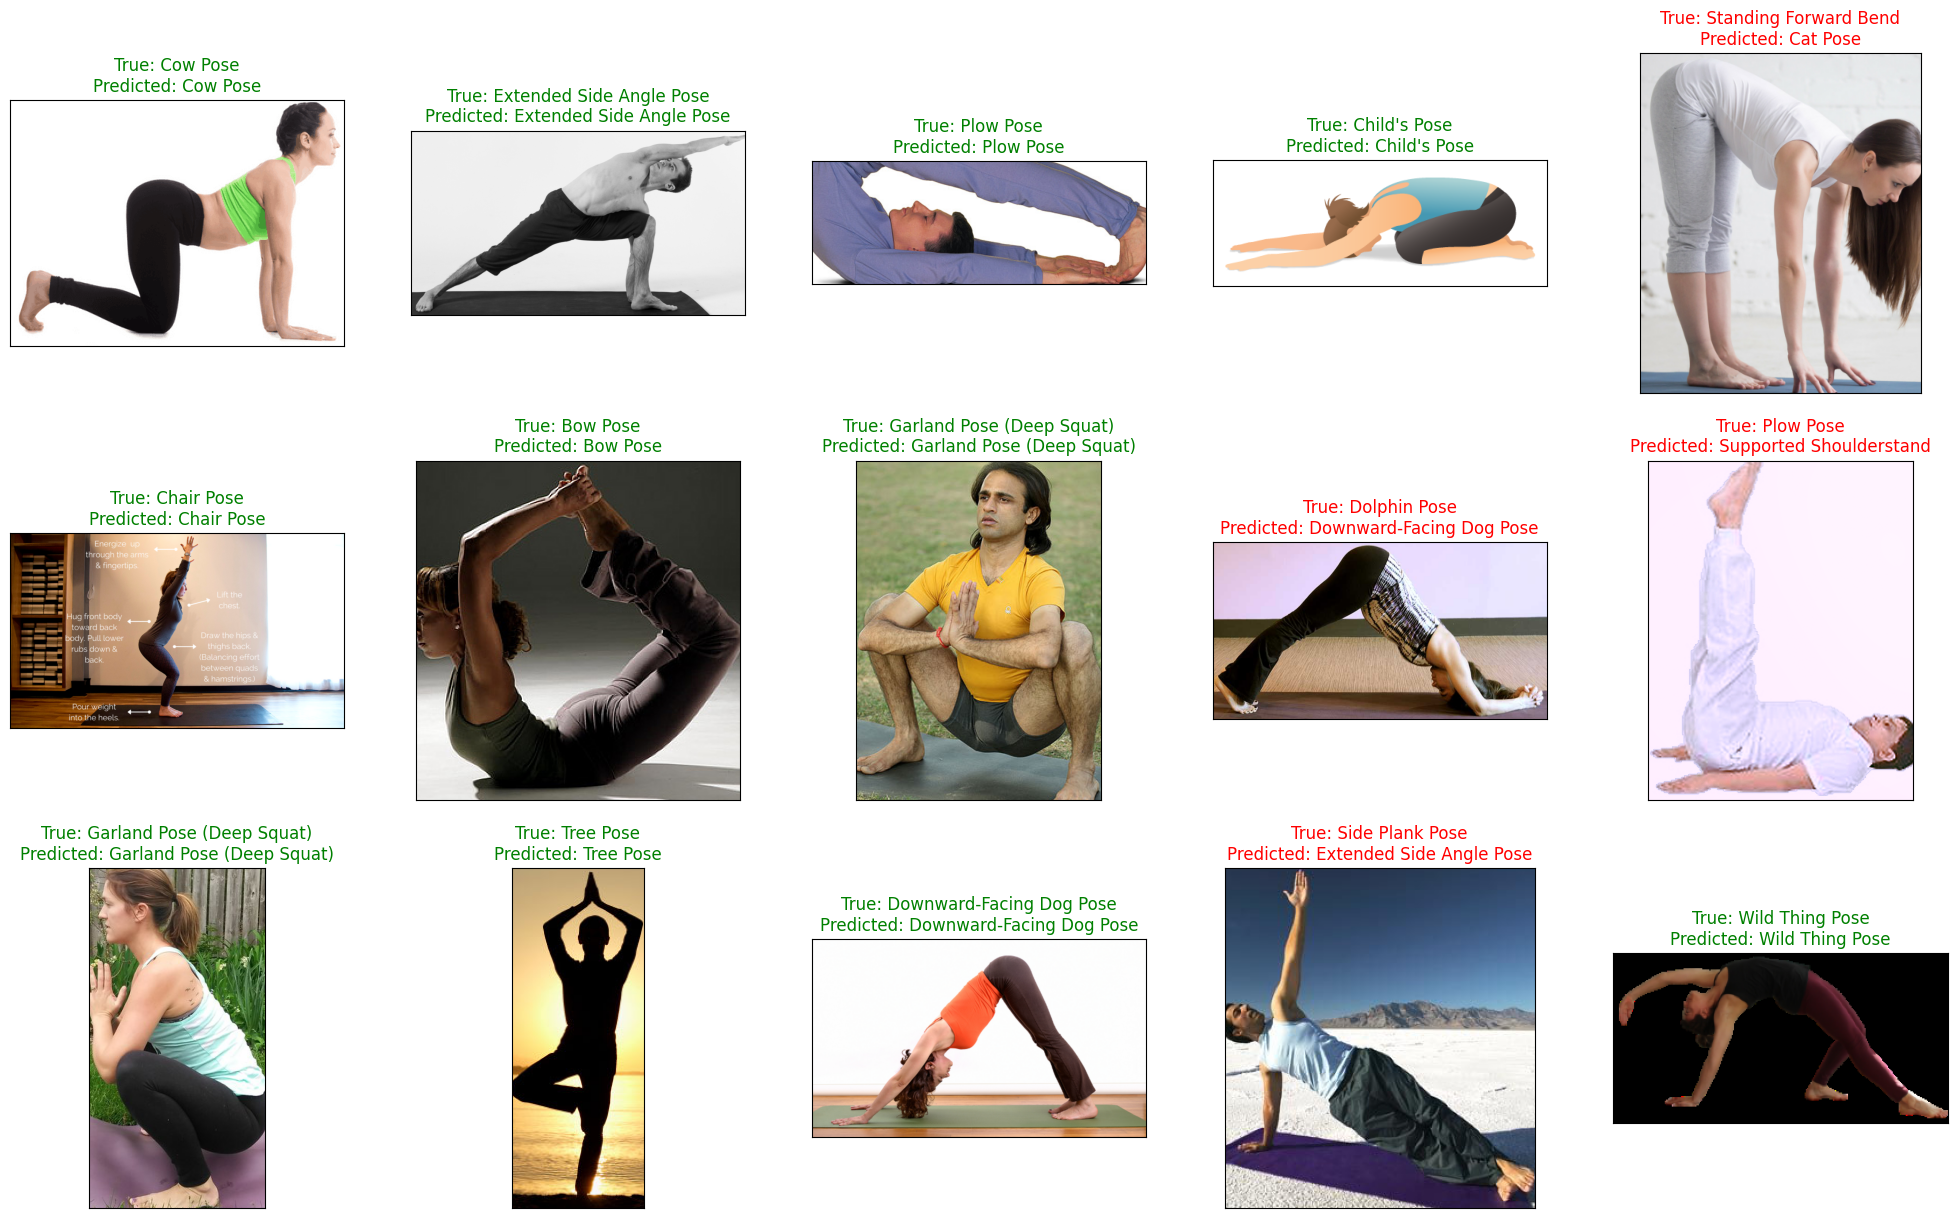

<Figure size 640x480 with 0 Axes>

In [ ]:
# Display 15 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

## **Plotting the classification reports and confusion matrix**

In [ ]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                                       precision    recall  f1-score   support

                     Bound Angle Pose       0.95      0.68      0.79        28
                             Bow Pose       1.00      0.94      0.97        18
                          Bridge Pose       0.95      0.86      0.90        21
                           Camel Pose       0.97      0.89      0.93        35
                             Cat Pose       0.71      0.79      0.75        19
                           Chair Pose       0.88      0.97      0.92        29
                         Child's Pose       0.96      0.96      0.96        28
                          Corpse Pose       0.00      0.00      0.00         1
                             Cow Pose       0.83      0.86      0.85        35
                  Crescent Lunge Pose       0.00      0.00      0.00         2
      Crescent Moon Pose (High Lunge)       0.00      0.00      0.00         1
                            Crow Pose       0.82   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Classification Report**

In [ ]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Bound Angle Pose,0.950000,0.678571,0.791667,28.000000
Bow Pose,1.000000,0.944444,0.971429,18.000000
Bridge Pose,0.947368,0.857143,0.900000,21.000000
Camel Pose,0.968750,0.885714,0.925373,35.000000
Cat Pose,0.714286,0.789474,0.750000,19.000000
Chair Pose,0.875000,0.965517,0.918033,29.000000
Child's Pose,0.964286,0.964286,0.964286,28.000000
Corpse Pose,0.000000,0.000000,0.000000,1.000000
Cow Pose,0.833333,0.857143,0.845070,35.000000
Crescent Lunge Pose,0.000000,0.000000,0.000000,2.000000
